# Тема “Обучение без учителя”

**Задание 1**

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

Создайте датафреймы X и y из этих данных.

In [5]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [9]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [10]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [15]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

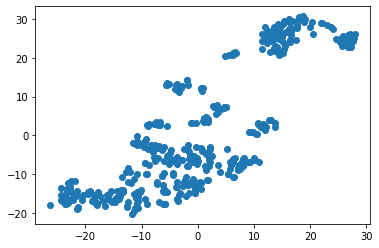

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [19]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
labels_train = kmeans.fit_predict(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

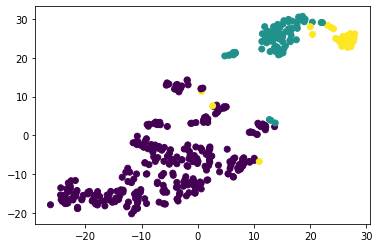

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [33]:
print('Среднее значение price в кластере 0: {}'.format(y_train[labels_train == 0].mean()))
print('Среднее значение price в кластере 1: {}'.format(y_train[labels_train == 1].mean()))
print('Среднее значение price в кластере 2: {}'.format(y_train[labels_train == 2].mean()))

Среднее значение price в кластере 0: 25.16868686868687
Среднее значение price в кластере 1: 17.442105263157895
Среднее значение price в кластере 2: 13.196774193548388


In [28]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_train.loc[labels_train == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.40486282828282844
Среднее значение CRIM в кластере 1: 11.745661842105266
Среднее значение CRIM в кластере 2: 14.360380322580648


**\* Задание 3**

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [34]:
labels_test = kmeans.fit_predict(X_test)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [35]:
print('Среднее значение price в кластере 0: {}'.format(y_test[labels_test == 0].mean()))
print('Среднее значение price в кластере 1: {}'.format(y_test[labels_test == 1].mean()))
print('Среднее значение price в кластере 2: {}'.format(y_test[labels_test == 2].mean()))

Среднее значение price в кластере 0: 23.91159420289855
Среднее значение price в кластере 1: 17.392307692307693
Среднее значение price в кластере 2: 12.814285714285713


In [36]:
print('Среднее значение CRIM в кластере 0: {}'.format(X_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 1: {}'.format(X_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Среднее значение CRIM в кластере 2: {}'.format(X_test.loc[labels_test == 2, 'CRIM'].mean()))

Среднее значение CRIM в кластере 0: 0.2464211594202899
Среднее значение CRIM в кластере 1: 8.469301923076923
Среднее значение CRIM в кластере 2: 19.021665714285714
